<a href="https://colab.research.google.com/github/zampolo/fct-pds/blob/master/colab/trabalho2021_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 2021-1: Downsampling e modulação

## Carregando módulos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft, fftshift
from scipy import signal
#teste para ver como se comporta

## Definindo os nomes dos arquivos e caminho

In [ ]:
path = '/content/drive/MyDrive/fct/fct-pds/wav/'
file1 = 'audio1.wav'
file2 = 'audio2.wav'

## Carrega arquivos de áudio e exibe algumas informações

In [ ]:
freq_amostragem_1, x1 = wavfile.read( path + file1 )
print('Frequência de amostragem: ', freq_amostragem_1)
print('Número de amostras e canais: ', x1.shape)

freq_amostragem_2, x2 = wavfile.read( path + file2 )
print('Frequência de amostragem: ', freq_amostragem_2)
print('Número de amostras e canais: ', x2.shape)

Frequência de amostragem:  48000
Número de amostras e canais:  (441615,)
Frequência de amostragem:  44100
Número de amostras e canais:  (418176, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """


## Ajusta dimensões dos sinais

In [ ]:
# Compatibilizando
x1 = 100*x1[:x2.shape[0]]
x2 = x2[:,0]

In [ ]:
print('Número de amostras e canais: ',x1.shape)
print('Número de amostras e canais: ',x2.shape)

Número de amostras e canais:  (418176,)
Número de amostras e canais:  (418176,)


## Downsampling

In [ ]:
x1d = signal.decimate(x1,2)
x2d = signal.decimate(x2,2)

## Projeto de filtro de conformação

In [ ]:
N, Wn = signal.ellipord(1/5, 1/4, 1, 40)
b, a = signal.ellip(N, 1, 40, Wn, 'low')
print('Ordem do filtro: ',N)
print('Coeficientes do denominador da função de transferência: ', a)
print('Coeficientes do numerador da função de transferência: ',b)

Ordem do filtro:  5
Coeficientes do denominador da função de transferência:  [ 1.         -3.90428596  6.58189562 -5.89390495  2.79348081 -0.5599263 ]
Coeficientes do numerador da função de transferência:  [ 0.01532081 -0.02208251  0.01539131  0.01539131 -0.02208251  0.01532081]


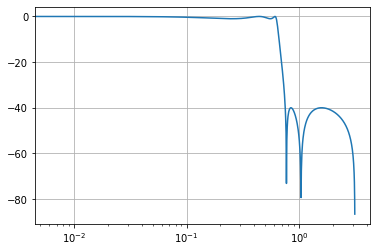

In [ ]:
# Gráfico da magnitude da resposta em frequência do filtro de conformação
w, h = signal.freqz(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.grid(True)
plt.show()

## Conformação dos sinais (filtragem)

In [ ]:
x11 = signal.lfilter(b,a,x1d)
x22 = signal.lfilter(b,a,x2d)


## Modulação

In [ ]:
w1 = 2* np.pi /5
n = np.arange(len(x11))
x1m = x11 * np.cos(w1 * n)

w2 = 4* np.pi /5
n = np.arange(len(x22))
x2m = x22 * np.cos(w2 * n)

## Soma dos sinais modulados

In [ ]:
y = x1m + x2m
